# Importing Necessary Libraries

#### 1. Importing pandas

Purpose: pandas is a powerful library for data manipulation and analysis.

Use: It is primarily used to load, clean, and explore datasets in tabular format (DataFrames).

#### 2. Importing matplotlib.pyplot

Purpose: matplotlib is a plotting library for creating static, interactive, and animated visualizations in Python.

Use: The pyplot module provides a simple interface for creating plots like line charts, scatter plots, and histograms.

#### 3. Importing seaborn

Purpose: seaborn is a data visualization library built on top of matplotlib.

Use: It offers high-level functions for creating attractive and informative statistical graphics, such as heatmaps, boxplots, and pair plots.

#### 4. Importing LabelEncoder from sklearn.preprocessing

Purpose: LabelEncoder converts categorical data (text labels) into numeric labels.

Use: Useful for preparing data for machine learning models that work only with numerical inputs.

#### 5. Importing stats from scipy

Purpose: scipy provides tools for scientific computing. The stats module includes functions for statistical computations and tests.

Use: Perform statistical analysis like calculating z-scores, t-tests, and regression diagnostics.

#### 6. Suppressing Warnings

Purpose: Warnings can clutter the output, especially during experimentation.

Use: Suppresses warning messages to improve code readability. Useful in Jupyter notebooks and environments where warnings are non-critical.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Dataset Import

- Use Python libraries such as pandas to load the CSV file.

In [2]:
df = pd.read_csv("bank_marketing.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,NaN,5,may,198,1,-1,0,unknown,no


# Dataset Overview

- Describe dataset dimensions, data types, and summary statistics.

In [3]:
print(df.shape)  # Dimensions

(45211, 17)


In [4]:
print(df.info())  # Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43872 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    43905 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    43828 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  deposit    45211 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.9+ MB
None


In [5]:
print(df.describe(include='all'))  # Summary statistics

                 age          job  marital  education default        balance  \
count   43872.000000        45211    45211      45211   43905   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   43113            NaN   
mean       40.924781          NaN      NaN        NaN     NaN    1362.272058   
std        10.610835          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing   loan   contact        

# Handle Missing Data

- Identify missing values

In [6]:
print(df.isnull().sum())

age          1339
job             0
marital         0
education       0
default      1306
balance         0
housing         0
loan            0
contact      1383
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
deposit         0
dtype: int64


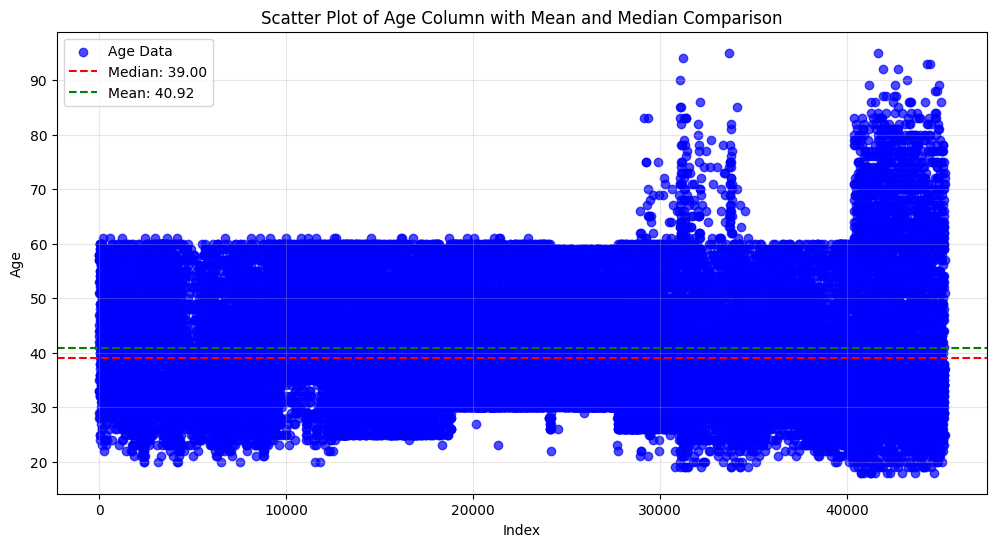

In [7]:

# Calculate median and mean of the 'age' column, ignoring missing values
median_age = df['age'].median()
mean_age = df['age'].mean()

# Scatter plot for visualizing outliers in the age column
plt.figure(figsize=(12, 6))
plt.scatter(range(len(df['age'])), df['age'], alpha=0.7, color='blue', label="Age Data")
plt.axhline(y=median_age, color='red', linestyle='--', label=f'Median: {median_age:.2f}')
plt.axhline(y=mean_age, color='green', linestyle='--', label=f'Mean: {mean_age:.2f}')
plt.title("Scatter Plot of Age Column with Mean and Median Comparison")
plt.xlabel("Index")
plt.ylabel("Age")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

The mean is higher than the median, and the presence of outliers seems likely (based on the difference), the median is the better choice for imputing missing values in the age column. It ensures that your imputation is more representative of the majority of the data, without being distorted by outliers.

In [8]:
df['age'].fillna(df['age'].median(), inplace=True)

In [9]:
df['default'].value_counts()

default
no     43113
yes      792
Name: count, dtype: int64

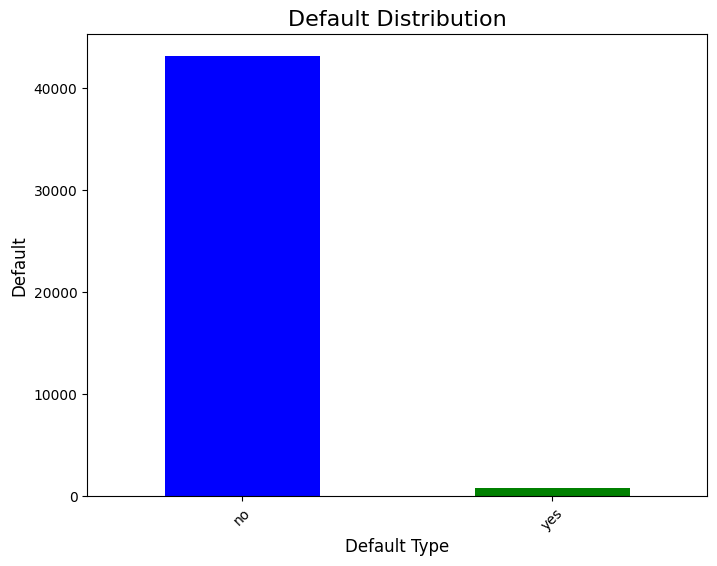

In [10]:
# Plot the bar graph for the 'contact' column
plt.figure(figsize=(8, 6))
df['default'].value_counts().plot(kind='bar', color=['blue', 'green', 'coral'])
plt.title('Default Distribution', fontsize=16)
plt.xlabel('Default Type', fontsize=12)
plt.ylabel('Default', fontsize=12)
plt.xticks(rotation=45)
plt.show()

The best approach in this case would likely be to impute missing values with the most frequent category ("no"), as it preserves the balance of the dataset and is simple to implement. Since "no" is overwhelmingly the more frequent category, it makes sense to impute the missing values with the most common category, "no". This will ensure that you are not introducing any bias by assigning the missing values to the less frequent category ("yes").



In [11]:
df['default'].fillna(df['default'].mode()[0], inplace=True)

In [12]:
df['contact'].value_counts()

contact
cellular     28410
unknown      12609
telephone     2809
Name: count, dtype: int64

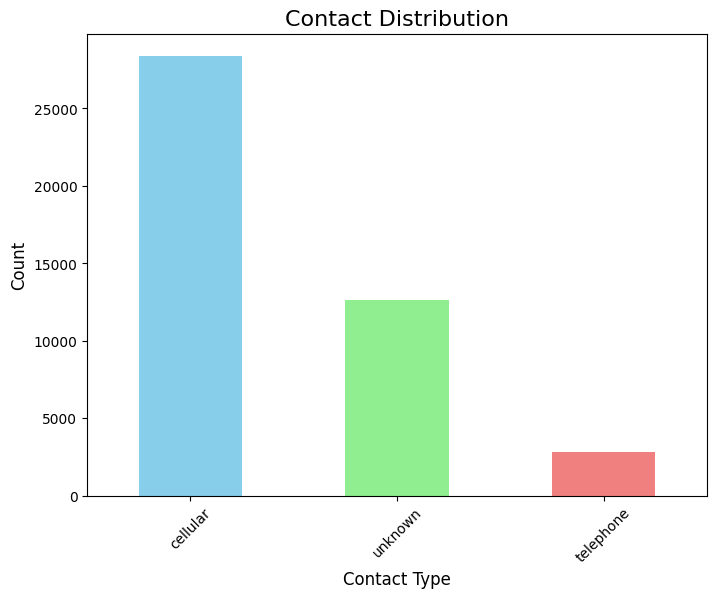

In [13]:
# Plot the bar graph for the 'contact' column
plt.figure(figsize=(8, 6))
df['contact'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Contact Distribution', fontsize=16)
plt.xlabel('Contact Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Given the distribution of values, the best approach would likely be to impute the missing values with the most frequent category, "cellular". This approach helps maintain the natural distribution and is simple to implement.

In [14]:
df['contact'].fillna(df['contact'].mode()[0], inplace=True)

In [15]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


# Transform and Engineer Features

In [16]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,cellular,5,may,198,1,-1,0,unknown,no


# Aggregation

Aggregation helps summarize and combine features or values that have a logical relationship, which can reduce data dimensionality and enhance insights. This is useful for reducing noise or creating new features that capture relevant information.

Age to create age groups or summarizing certain categorical variables (e.g., job into job categories) could be a good choice.

In [17]:
bins = [0, 18, 35, 50, 100]  # age bins
labels = ['0-18', '19-35', '36-50', '50+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Aggregating 'balance' by 'age_group' (average balance by age group)
age_group_balance = df.groupby('age_group')['balance'].mean()
print(age_group_balance)

age_group
0-18      372.416667
19-35    1133.523429
36-50    1323.584598
50+      1868.244335
Name: balance, dtype: float64


# Normalization

For balance, duration and campaign: If the values are not heavily skewed and are roughly within the same range (like small positive integers), Min-Max Scaling could work well.

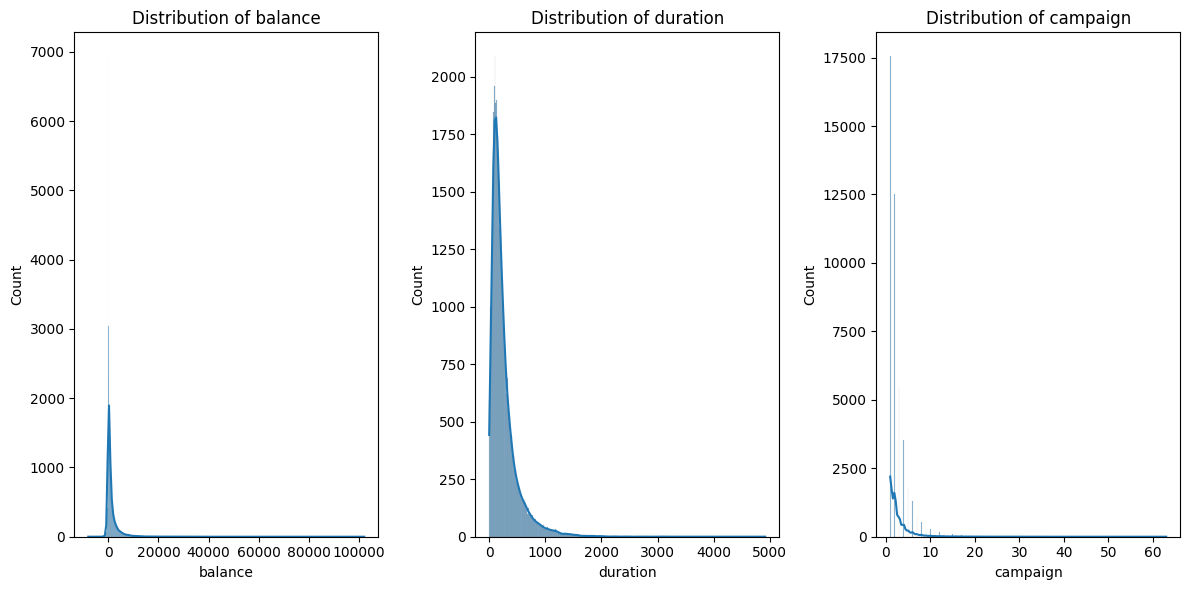

In [18]:
# Select numerical columns
columns_to_check = ['balance', 'duration', 'campaign']

# Plot histograms for distribution
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

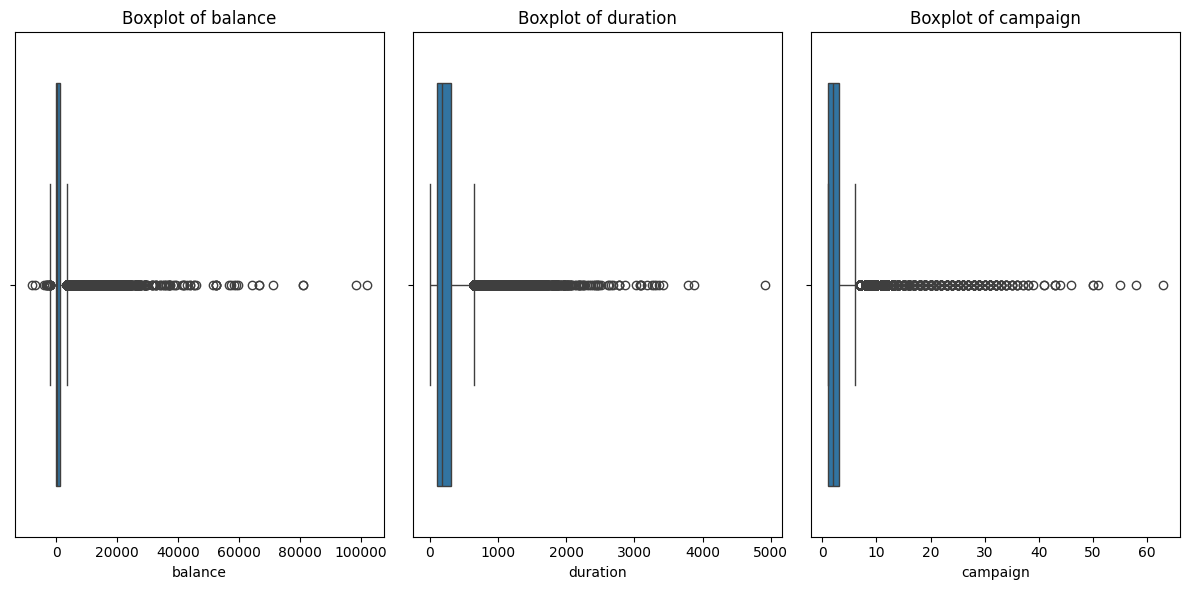

In [19]:
# Boxplot for outliers detection
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [20]:
# Z-score method to detect outliers
z_scores = stats.zscore(df[columns_to_check])
outliers_zscore = (abs(z_scores) > 3).sum(axis=0)
print("Number of outliers based on Z-score for each column:")
print(outliers_zscore)

# IQR method to detect outliers
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((df[columns_to_check] < (Q1 - 1.5 * IQR)) | (df[columns_to_check] > (Q3 + 1.5 * IQR))).sum(axis=0)
print("\nNumber of outliers based on IQR for each column:")
print(outliers_iqr)

Number of outliers based on Z-score for each column:
balance     745
duration    963
campaign    840
dtype: int64

Number of outliers based on IQR for each column:
balance     4729
duration    3235
campaign    3064
dtype: int64


- IQR Method generally detects more outliers because it is more conservative about values that fall outside the expected range based on percentiles.
- Z-Score Method is more sensitive to data that follows a normal distribution and can be affected by extreme values.

The balance, duration, and campaign columns are likely to have varying ranges and may not be normally distributed, Min-Max scaling is often a safer choice to transform these features into a uniform scale. However, Standard Scaling ensures that each feature has a mean of 0 and a standard deviation of 1. This gives each feature equal importance, and no feature dominates the separation process due to its scale. For example, a feature with a range of 0-1 and another with a range of 0-10000 would have a comparable influence on the decision boundary after standardization.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['balance', 'duration', 'campaign']] = scaler.fit_transform(df[['balance', 'duration', 'campaign']])

print("\nStandard Scaled Data:")
df[['balance', 'duration', 'campaign']].head()


Standard Scaled Data:


,balance,duration,campaign
0,0.256419,0.011016,-0.569351
1,-0.437895,-0.416127,-0.569351
2,-0.446762,-0.707361,-0.569351
3,0.047205,-0.645231,-0.569351
4,-0.447091,-0.233620,-0.569351


# Feature Construction

Feature construction involves creating new features from existing ones, which can improve the model's predictive power by capturing more relevant information.

balance_to_duration_ratio to indicate the relative importance of balance over duration, or combine month and day into a new date_feature for more granular time-based analysis.

In [22]:
# Feature Construction: Creating a new feature 'balance_to_duration_ratio'
df['balance_to_duration_ratio'] = df['balance'] / (df['duration'] + 1e-5)  # To avoid division by zero

# Combining 'day' and 'month' into a new feature 'day_month'
df['day_month'] = df['day'].astype(str) + '-' + df['month']

In [23]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group,balance_to_duration_ratio,day_month
0,58.0,management,married,tertiary,no,0.256419,yes,no,unknown,5,may,0.011016,-0.569351,-1,0,unknown,no,50+,23.255666,5-may
1,44.0,technician,single,secondary,no,-0.437895,yes,no,unknown,5,may,-0.416127,-0.569351,-1,0,unknown,no,36-50,1.052336,5-may
2,33.0,entrepreneur,married,secondary,no,-0.446762,yes,yes,unknown,5,may,-0.707361,-0.569351,-1,0,unknown,no,19-35,0.631600,5-may
3,47.0,blue-collar,married,unknown,no,0.047205,yes,no,unknown,5,may,-0.645231,-0.569351,-1,0,unknown,no,36-50,-0.073162,5-may
4,33.0,unknown,single,unknown,no,-0.447091,no,no,cellular,5,may,-0.233620,-0.569351,-1,0,unknown,no,19-35,1.913832,5-may


# Discretization

Discretization is the process of converting continuous features into discrete categories. It can improve the interpretability of the model and might help when there is no clear linear relationship between features and target variables.

Discretizing balance into categories like 'Low', 'Medium', and 'High' based on certain thresholds.

In [24]:
# Discretizing 'balance' into categories
balance_bins = [-float('inf'), -0.5, 0.5, float('inf')]
balance_labels = ['Low', 'Medium', 'High']
df['balance_category'] = pd.cut(df['balance'], bins=balance_bins, labels=balance_labels)

# Data Analysis and Visualization

In [25]:
for column in df.columns:
    print(f"Unique values in '{column}': {len(df[column].unique())}\n")

Unique values in 'age': 77

Unique values in 'job': 12

Unique values in 'marital': 3

Unique values in 'education': 4

Unique values in 'default': 2

Unique values in 'balance': 7168

Unique values in 'housing': 2

Unique values in 'loan': 2

Unique values in 'contact': 3

Unique values in 'day': 31

Unique values in 'month': 12

Unique values in 'duration': 1573

Unique values in 'campaign': 48

Unique values in 'pdays': 559

Unique values in 'previous': 41

Unique values in 'poutcome': 4

Unique values in 'deposit': 2

Unique values in 'age_group': 4

Unique values in 'balance_to_duration_ratio': 41521

Unique values in 'day_month': 318

Unique values in 'balance_category': 3



Categorize Variables:

- Categorical: job, marital, education, contact, etc.
- Ordinal: education (primary < secondary < tertiary).
- Numerical: age, balance, duration, etc.

# Descriptive Statistics and Visualizations

# Reducing Redundant Data

Redundant data occurs when multiple features contain similar or repetitive information. Reducing redundancy through techniques like correlation analysis or removing highly correlated variables can help improve model performance by reducing overfitting.

If two features have a correlation coefficient above a certain threshold (e.g., 0.7), you might want to drop one of them.

In [26]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,deposit,age_group,balance_to_duration_ratio,day_month,balance_category
0,58.0,management,married,tertiary,no,0.256419,yes,no,unknown,5,...,0.011016,-0.569351,-1,0,unknown,no,50+,23.255666,5-may,Medium
1,44.0,technician,single,secondary,no,-0.437895,yes,no,unknown,5,...,-0.416127,-0.569351,-1,0,unknown,no,36-50,1.052336,5-may,Medium
2,33.0,entrepreneur,married,secondary,no,-0.446762,yes,yes,unknown,5,...,-0.707361,-0.569351,-1,0,unknown,no,19-35,0.631600,5-may,Medium
3,47.0,blue-collar,married,unknown,no,0.047205,yes,no,unknown,5,...,-0.645231,-0.569351,-1,0,unknown,no,36-50,-0.073162,5-may,Medium
4,33.0,unknown,single,unknown,no,-0.447091,no,no,cellular,5,...,-0.233620,-0.569351,-1,0,unknown,no,19-35,1.913832,5-may,Medium


In [27]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to be encoded
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 
                       'poutcome', 'deposit', 'age_group', 'day_month', 'balance_category']

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Show the DataFrame with encoded labels
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,deposit,age_group,balance_to_duration_ratio,day_month,balance_category
0,58.0,4,1,2,0,0.256419,1,0,2,5,...,0.011016,-0.569351,-1,0,3,0,3,23.255666,271,2
1,44.0,9,2,1,0,-0.437895,1,0,2,5,...,-0.416127,-0.569351,-1,0,3,0,2,1.052336,271,2
2,33.0,2,1,1,0,-0.446762,1,1,2,5,...,-0.707361,-0.569351,-1,0,3,0,1,0.631600,271,2
3,47.0,1,1,3,0,0.047205,1,0,2,5,...,-0.645231,-0.569351,-1,0,3,0,2,-0.073162,271,2
4,33.0,11,2,3,0,-0.447091,0,0,0,5,...,-0.233620,-0.569351,-1,0,3,0,1,1.913832,271,2


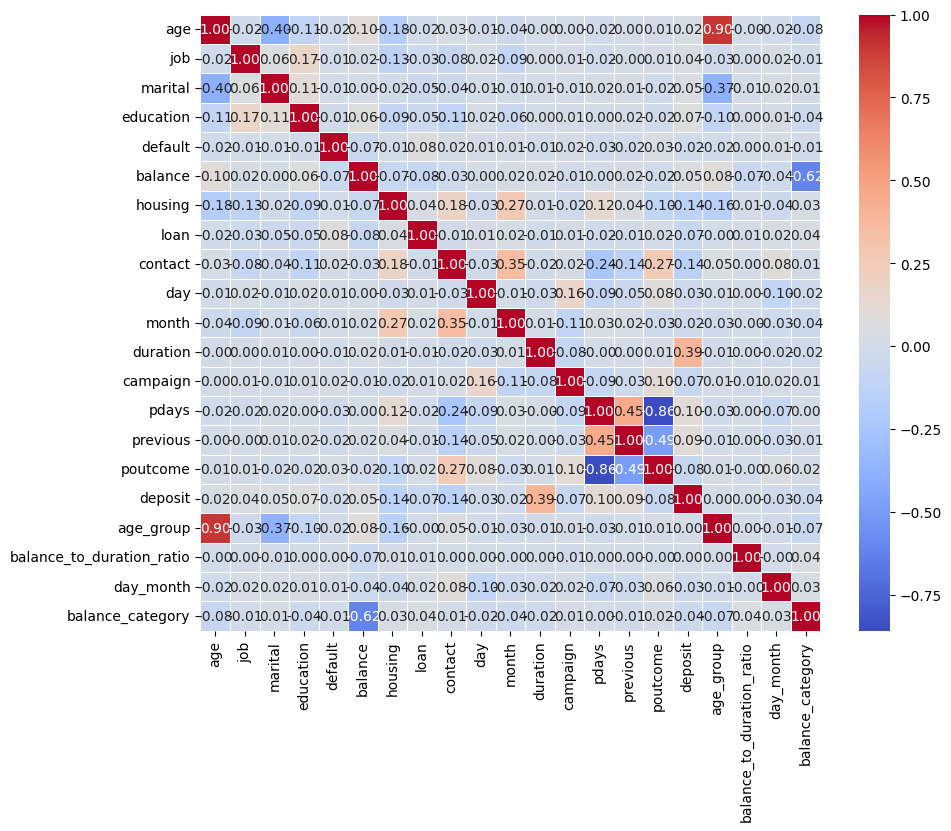

In [28]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [29]:
# Removing highly correlated features (threshold 0.7)
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

print("Correlation Features: ", correlated_features)

# Drop the correlated features
df.drop(columns=correlated_features, inplace=True)

df.head()

Correlation Features:  {'age_group', 'poutcome'}


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit,balance_to_duration_ratio,day_month,balance_category
0,58.0,4,1,2,0,0.256419,1,0,2,5,8,0.011016,-0.569351,-1,0,0,23.255666,271,2
1,44.0,9,2,1,0,-0.437895,1,0,2,5,8,-0.416127,-0.569351,-1,0,0,1.052336,271,2
2,33.0,2,1,1,0,-0.446762,1,1,2,5,8,-0.707361,-0.569351,-1,0,0,0.631600,271,2
3,47.0,1,1,3,0,0.047205,1,0,2,5,8,-0.645231,-0.569351,-1,0,0,-0.073162,271,2
4,33.0,11,2,3,0,-0.447091,0,0,0,5,8,-0.233620,-0.569351,-1,0,0,1.913832,271,2
